In [2]:
# imports necesários
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# nomes das colunas que seram usadas
names = ['sepal-legth', 'sepal-width', 'petal-length', 'petal-class', 'class']
# criação do dataframe
df = pd.read_csv('iris.data', delimiter=',', names=names)

In [4]:
# dimenssões do dataset
# df.shape retorna uma tupla contendo o número de registros e o número de colunas
print(df.shape)

(150, 5)


In [5]:
#mostra os vinte primeiros registros
print(df.head(20))

    sepal-legth  sepal-width  petal-length  petal-class        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
10          5.4          3.7           1.5          0.2  Iris-setosa
11          4.8          3.4           1.6          0.2  Iris-setosa
12          4.8          3.0           1.4          0.1  Iris-setosa
13          4.3          3.0      

In [6]:
# estatisticas gerais do dataset
print(df.describe())

       sepal-legth  sepal-width  petal-length  petal-class
count   150.000000   150.000000    150.000000   150.000000
mean      5.843333     3.054000      3.758667     1.198667
std       0.828066     0.433594      1.764420     0.763161
min       4.300000     2.000000      1.000000     0.100000
25%       5.100000     2.800000      1.600000     0.300000
50%       5.800000     3.000000      4.350000     1.300000
75%       6.400000     3.300000      5.100000     1.800000
max       7.900000     4.400000      6.900000     2.500000


In [7]:
# Distribuição da classe
print(df.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


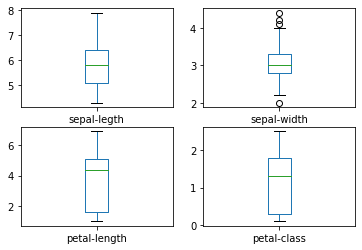

In [10]:
# criando gráficos para entender o dataset
df.plot(kind='box', subplots=True, layout=(2, 2), sharey=False, sharex=False)
plt.show()

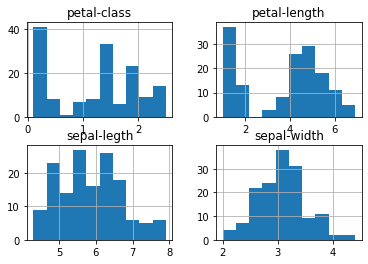

In [11]:
# histograma
df.hist()
plt.show()

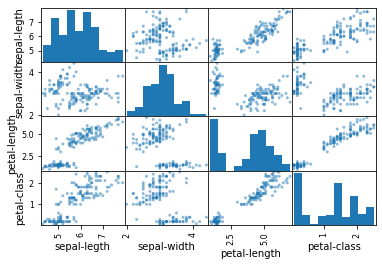

In [14]:
pd.plotting.scatter_matrix(df)
plt.show()

In [15]:
# separação do dataset para teste e validação.
array = df.values
X = array[: ,0:4]
Y = array[: ,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

In [16]:
seed = 7
scoring = 'accuracy'

In [19]:
# construindo modelos
# models vai receber o nome do algoritmo e o algoritmo
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
# percorre todos os algoritmos e executa cada um deles.
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f'{name}: {cv_results.mean()}, {cv_results.std()}'
    print(msg)

LR: 0.9666666666666666, 0.04082482904638632
LDA: 0.975, 0.03818813079129868
KNN: 0.9833333333333332, 0.03333333333333335
CART: 0.9666666666666666, 0.04082482904638632
NB: 0.975, 0.053359368645273735
SVM: 0.9916666666666666, 0.025000000000000012


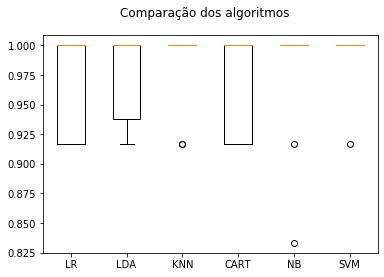

In [22]:
# Gráfico de comparação dos algoritmos
fig = plt.figure()
fig.suptitle('Comparação dos algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [23]:
# Predições
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print(accuracy_score(Y_validation, predictions)) # acuracia do algoritmo
print(confusion_matrix(Y_validation, predictions)) # Matriz de confusão
print(classification_report(Y_validation, predictions)) # relatório de classificação

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

